In [44]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt


In [45]:
dt = pd.read_csv(r'..\spider\utils\forecast1.csv', sep=';')
dt = dt[dt['щука'] > -1]
dt

,day_temp,day_pressure,day_obl,day_phen,day_dir,day_wind,areal,city,year,month,...,красноперка,налим,густера,амур,ерш,сазан,подуст,толстолобик,вобла,хариус
142,17,751,dull,storm,З,1,Алтайский край,Барнаул,2020,5,...,1,0.0,1,0,1,0.0,1,1,0,1.0
143,23,752,suncl,-,З,1,Алтайский край,Барнаул,2020,5,...,1,0.0,1,1,1,0.0,1,1,0,1.0
144,22,751,dull,-,ЮЗ,1,Алтайский край,Барнаул,2020,5,...,1,0.0,1,1,1,0.0,1,1,0,1.0
152,25,740,sun,-,С,2,Алтайский край,Барнаул,2020,6,...,1,0.0,1,1,1,0.0,1,1,1,1.0
198,32,744,sunc,-,СВ,2,Алтайский край,Барнаул,2020,7,...,1,0.0,1,1,1,1.0,1,1,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29138,10,745,suncl,-,Ю,3,Московская область,Одинцово,2020,3,...,1,1.0,1,0,1,0.0,0,0,0,0.0
29183,10,736,sun,-,СЗ,8,Московская область,Одинцово,2020,4,...,0,0.0,1,0,1,0.0,0,0,0,0.0
29278,26,746,dull,-,Ю,5,Московская область,Одинцово,2020,7,...,1,0.0,1,1,1,1.0,1,1,1,1.0
29651,25,749,sun,-,ЮЗ,3,Московская область,Подольск,2020,8,...,1,0.0,1,1,1,1.0,1,1,1,1.0


In [46]:
fishs = ['щука', 'судак', 'окунь', 'берш', 'речная форель', 'озерная форель', 'елец', 'чехонь', 'сом', 'голавль', 'язь',
         'карп', 'жерех', 'лещ', 'карась', 'линь', 'пескарь', 'ротан', 'плотва', 'красноперка', 'налим', 'густера',
         'амур', 'ерш', 'сазан', 'подуст', 'толстолобик', 'вобла', 'хариус']

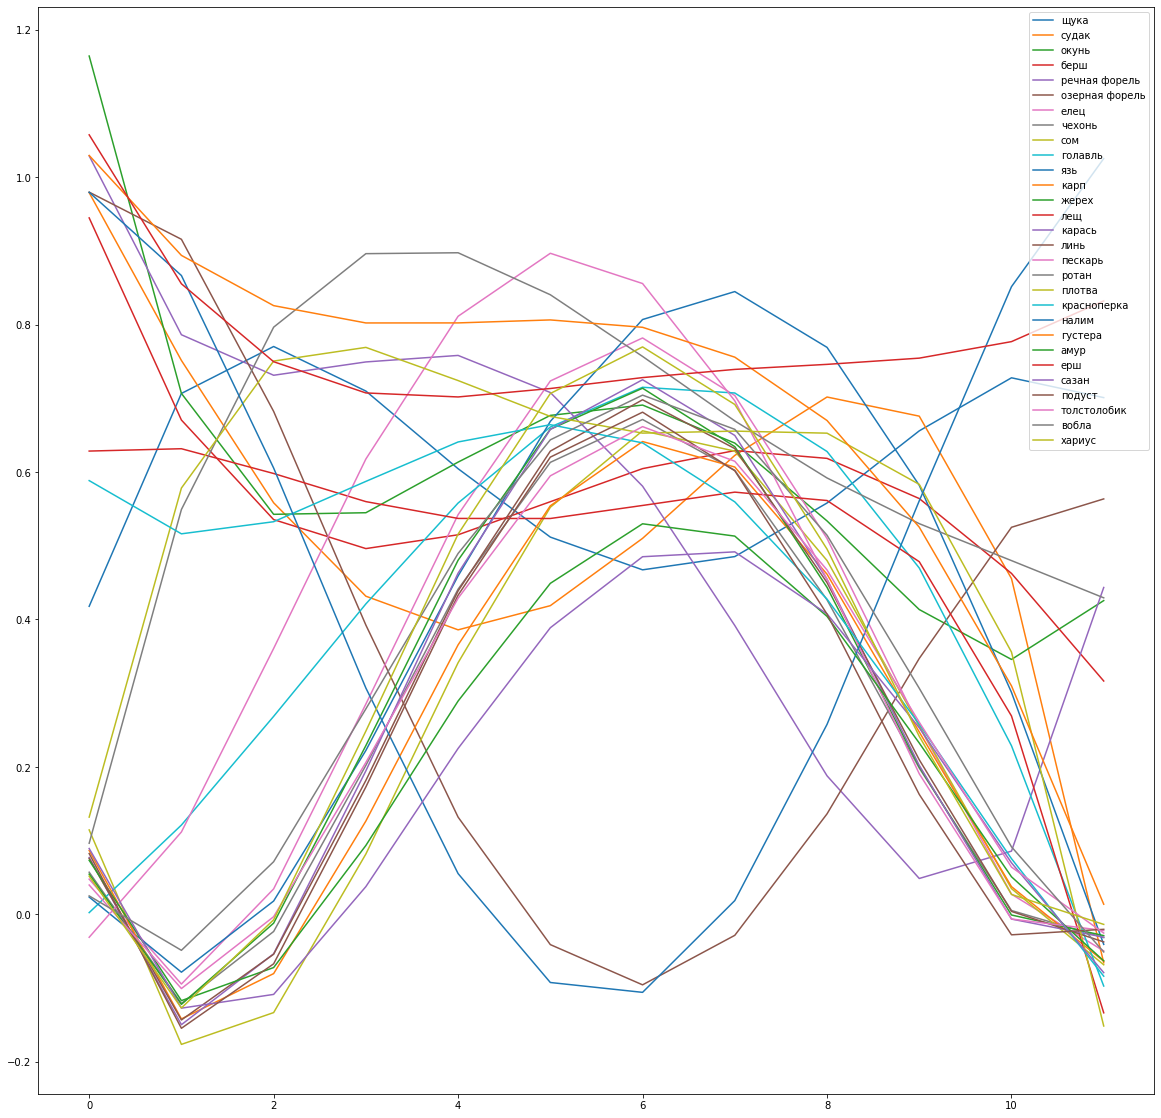

In [49]:
dt_stat = dt.groupby(by=['month'], as_index=False).mean()[fishs]
for fish in fishs:
    temp = list(dt_stat[fish])
    poly = np.polyfit(list(range(1, 13)),temp,4)
    poly_y = np.poly1d(poly)(list(range(1, 13)))
    dt_stat[fish] = poly_y
dt_stat.plot(figsize=(20, 20))

In [50]:
data_path = r'regions_v2.csv'
dt = pd.read_csv(data_path)
dt

,region,stat,sities,waterplace_nature
0,Алтайский край,"{""main"": {""\u0431\u0435\u0440\u0448"": {""X"": {""...","[""\u0411\u0430\u0440\u043d\u0430\u0443\u043b"",...","[{""waterplace"": ""\u0411\u0430\u0440\u043d\u043..."
1,Амурская область,"{""main"": {""\u0435\u043b\u0435\u0446"": {""X"": {""...","[""\u0411\u0435\u043b\u043e\u0433\u043e\u0440\u...","[{""waterplace"": ""\u0410\u043c\u0443\u0440"", ""t..."
2,Архангельская область,"{""main"": {""\u043a\u0440\u0430\u0441\u043d\u043...","[""\u0410\u0440\u0445\u0430\u043d\u0433\u0435\u...","[{""waterplace"": ""\u0412\u0430\u0433\u0430"", ""t..."
3,Астраханская область,"{""main"": {""\u043e\u043a\u0443\u043d\u044c"": {""...","[""\u0410\u0441\u0442\u0440\u0430\u0445\u0430\u...","[{""waterplace"": ""\u0410\u0445\u0442\u0443\u043..."
4,Белгородская область,"{""main"": {""\u0440\u043e\u0442\u0430\u043d"": {""...","[""\u0411\u0435\u043b\u0433\u043e\u0440\u043e\u...","[{""waterplace"": ""\u0411\u0435\u043b\u0433\u043..."
...,...,...,...,...
77,Чеченская республика,"{""main"": {""\u043e\u043a\u0443\u043d\u044c"": {""...","[""\u0413\u0440\u043e\u0437\u043d\u044b\u0439"",...","[{""waterplace"": ""\u0421\u0443\u043d\u0436\u043..."
78,Чувашская республика,"{""main"": {""\u043e\u043a\u0443\u043d\u044c"": {""...","[""\u0410\u043b\u0430\u0442\u044b\u0440\u044c"",...","[{""waterplace"": ""\u0410\u043b\u0430\u0442\u044..."
79,Чукотский автономный округ,"{""main"": {""\u043e\u043a\u0443\u043d\u044c"": {""...","[""\u0410\u043d\u0430\u0434\u044b\u0440\u044c"",...","[{""waterplace"": ""\u041a\u0440\u0430\u0441\u043..."
80,Ямало-Ненецкий автономный округ,"{""main"": {""\u043e\u043a\u0443\u043d\u044c"": {""...","[""\u0413\u0443\u0431\u043a\u0438\u043d\u0441\u...","[{""waterplace"": ""\u0411\u043e\u043b\u044c\u044..."


In [68]:
def rand_noise(data, min_=0, max_=100):
    temp = [min(max(int((_ + np.random.uniform(-0.1, 0.1)) * 100), min_), max_) for _ in data]
    return temp


new_stat = []
for i, row in dt.iterrows():
    stat = {'main': {fish: {'X': {'name': 'Месяц', 'values': list(range(1, 13))}, 'Y': {'name': 'Активность рыбы', 'values': []}} for fish in fishs}}
    for fish in fishs:
        stat['main'][fish]['Y']['values'] = rand_noise(list(dt_stat[fish]))
    new_stat.append(json.dumps(stat))

In [69]:
dt['stat'] = new_stat
dt

,region,stat,sities,waterplace_nature
0,Алтайский край,"{""main"": {""\u0449\u0443\u043a\u0430"": {""X"": {""...","[""\u0411\u0430\u0440\u043d\u0430\u0443\u043b"",...","[{""waterplace"": ""\u0411\u0430\u0440\u043d\u043..."
1,Амурская область,"{""main"": {""\u0449\u0443\u043a\u0430"": {""X"": {""...","[""\u0411\u0435\u043b\u043e\u0433\u043e\u0440\u...","[{""waterplace"": ""\u0410\u043c\u0443\u0440"", ""t..."
2,Архангельская область,"{""main"": {""\u0449\u0443\u043a\u0430"": {""X"": {""...","[""\u0410\u0440\u0445\u0430\u043d\u0433\u0435\u...","[{""waterplace"": ""\u0412\u0430\u0433\u0430"", ""t..."
3,Астраханская область,"{""main"": {""\u0449\u0443\u043a\u0430"": {""X"": {""...","[""\u0410\u0441\u0442\u0440\u0430\u0445\u0430\u...","[{""waterplace"": ""\u0410\u0445\u0442\u0443\u043..."
4,Белгородская область,"{""main"": {""\u0449\u0443\u043a\u0430"": {""X"": {""...","[""\u0411\u0435\u043b\u0433\u043e\u0440\u043e\u...","[{""waterplace"": ""\u0411\u0435\u043b\u0433\u043..."
...,...,...,...,...
77,Чеченская республика,"{""main"": {""\u0449\u0443\u043a\u0430"": {""X"": {""...","[""\u0413\u0440\u043e\u0437\u043d\u044b\u0439"",...","[{""waterplace"": ""\u0421\u0443\u043d\u0436\u043..."
78,Чувашская республика,"{""main"": {""\u0449\u0443\u043a\u0430"": {""X"": {""...","[""\u0410\u043b\u0430\u0442\u044b\u0440\u044c"",...","[{""waterplace"": ""\u0410\u043b\u0430\u0442\u044..."
79,Чукотский автономный округ,"{""main"": {""\u0449\u0443\u043a\u0430"": {""X"": {""...","[""\u0410\u043d\u0430\u0434\u044b\u0440\u044c"",...","[{""waterplace"": ""\u041a\u0440\u0430\u0441\u043..."
80,Ямало-Ненецкий автономный округ,"{""main"": {""\u0449\u0443\u043a\u0430"": {""X"": {""...","[""\u0413\u0443\u0431\u043a\u0438\u043d\u0441\u...","[{""waterplace"": ""\u0411\u043e\u043b\u044c\u044..."


In [71]:
dt.to_csv('regions_v3.csv', index=False)